### Predicting the Sale Price of Bulldozers using Machine Learning 
 we're going to go through an example machine learning project to use the characteristics of bulldozers and their past sales prices to predict the sale price of future bulldozers based on their characteristics.

Since we're trying to predict a number, this kind of problem is known as a regression problem
And since we're going to predicting results with a time component (predicting future sales based on past sales), this is also known as a time series or forecasting problem.

### There are 3 datasets:

Train.csv - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).
Valid.csv - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
Test.csv - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict)

#### 3. Evaluation

For this problem, the goal will be to get this value as low as possible (a low error value means our model's predictions are close to what the real values are).

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the [Kaggle leaderboard](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard).

### Features
Features are different parts and attributes of the data.

During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this is to create a data dictionary.


| Variable Name | Description  | Variable Type |
|------|-----|-----|
| SalesID   | unique identifier of a particular sale of a machine at auction  | Independent  variable |
| MachineID  | identifier for a particular machine; machines may have multiple sales  | Independent  variable |
| ModelID | identifier for a unique machine model (i.e. fiModelDesc) | Independent  variable |
| datasource  | source of the sale record; some sources are more diligent about reporting attributes of the machine than others. Note that a particular datasource may report on multiple auctioneerIDs. | Independent  variable |
| auctioneerID  | identifier of a particular auctioneer, i.e. company that sold the machine at auction. Not the same as datasource.  | Independent  variable |
| YearMade  | year of manufacturer of the Machine  | Independent  variable |
| MachineHoursCurrentMeter | current usage of the machine in hours at time of sale (saledate); null or 0 means no hours have been reported for that sale | Independent  variable |
| UsageBand | value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel; e.g. 'Low' means this machine has fewer hours given its lifespan relative to the average of fiBaseModel. | Independent  variable |
| Saledate   | time of sale | Independent  variable |
| fiModelDesc  | Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor  | Independent  variable |
| State | US State in which sale occurred | Independent  variable |
| Drive_System | machine configuration; typically describes whether 2 or 4 wheel drive  | Independent  variable |
| Enclosure  | machine configuration - does the machine have an enclosed cab or not | Independent  variable |
| Forks  | machine configuration - attachment used for lifting  | Independent  variable |
| Pad_Type | machine configuration - type of treads a crawler machine uses | Independent  variable |
| Ride_Control  | machine configuration - optional feature on loaders to make the ride smoother | Independent  variable |
| Transmission | machine configuration - describes type of transmission; typically automatic or manual | Independent  variable |
| ... | ... | ... |
| SalePrice | cost of sale in USD | Target/dependent variable | 


First, we'll import the dataset and start exploring. 

In [1]:
# Import data analysis tools 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# # Import the training and validation set
df = pd.read_csv('C:/Users/Windows10/OneDrive/المستندات/py2/bluebook-for-bulldozers/TrainAndValid.csv' ,
                 low_memory=False)
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

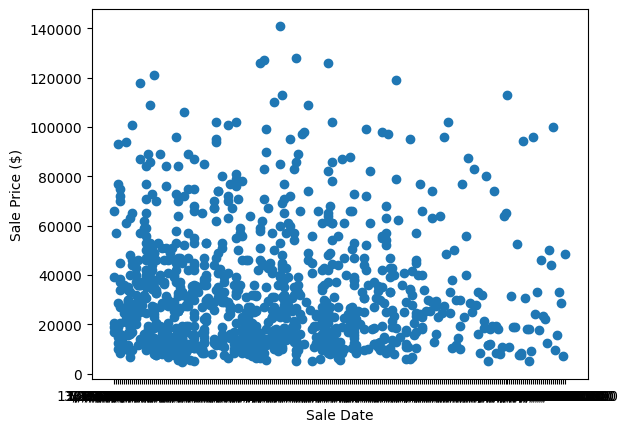

In [3]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], # visualize the first 1000 values
           y=df["SalePrice"][:1000])
ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)");

 looks like the x-axis is quite crowded.

Maybe we can fix this by turning the saledate column into datetime format.

 our SalePrice column is already in float64 format so we can view its distribution directly from the DataFrame using a histogram plot.

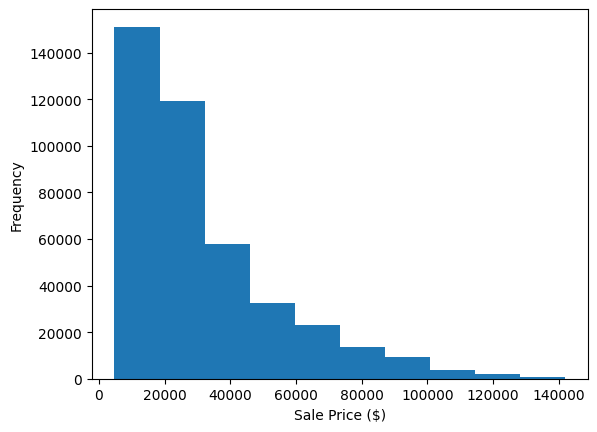

In [4]:
# View SalePrice distribution 
df.SalePrice.plot.hist(xlabel="Sale Price ($)");

In [5]:
# tranforming salesdate column to datetype format
df = pd.read_csv('C:/Users/Windows10/OneDrive/المستندات/py2/bluebook-for-bulldozers/TrainAndValid.csv' ,
                 low_memory=False,
                 parse_dates=['saledate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [6]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

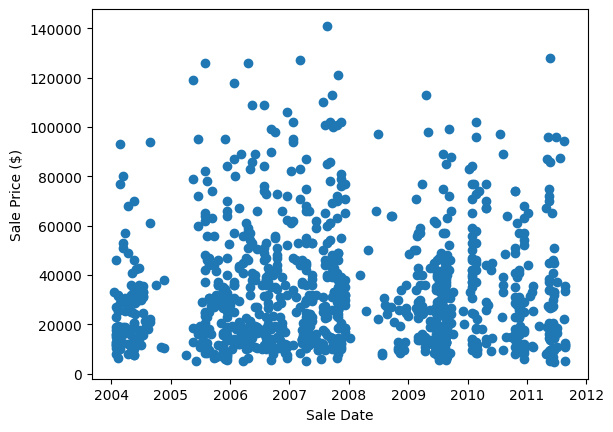

In [7]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], # visualize the first 1000 values
           y=df["SalePrice"][:1000])
ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)");

much better !! 

In [8]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(10), df.saledate.tail(10)

(205615   1989-01-17
 274835   1989-01-31
 141296   1989-01-31
 212552   1989-01-31
 62755    1989-01-31
 54653    1989-01-31
 81383    1989-01-31
 204924   1989-01-31
 135376   1989-01-31
 113390   1989-01-31
 Name: saledate, dtype: datetime64[ns],
 409202   2012-04-28
 408976   2012-04-28
 411695   2012-04-28
 411319   2012-04-28
 408889   2012-04-28
 410879   2012-04-28
 412476   2012-04-28
 411927   2012-04-28
 407124   2012-04-28
 409203   2012-04-28
 Name: saledate, dtype: datetime64[ns])

### Adding extra features to our DataFrame

One way to potentially increase the predictive power of our data is to enhance it with more features.

This practice is known as feature engineering , taking existing features and using them to create more/different features. 

For now, we'll use our saledate column to add extra features such as:

* Year of sale
* Month of sale
* Day of sale
* Day of week sale (e.g. Monday = 1, Tuesday = 2)
* Day of year sale (e.g. January 1st = 1, January 2nd = 2)

Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [9]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

# Add datetime parameters for saledate
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.saledate.dt.dayofyear

# Drop original saledate column
df_tmp.drop("saledate", axis=1, inplace=True)

In [10]:
df_tmp

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984,16000.0,1915521,5266,149,99.0,2001,NaN,NaN,D38E,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,4,28,5,119
412476,6324811,6000.0,1919104,19330,149,99.0,2004,NaN,NaN,2064,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
411927,6313029,16000.0,1918416,17244,149,99.0,2004,NaN,NaN,337G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119
407124,6266251,55000.0,509560,3357,149,99.0,1993,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,2012,4,28,5,119


In [11]:
# ckeching the new columns
df_tmp[["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayofweek", "saleDayofyear"]].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,9500.0,1989,1,17,1,17
274835,14000.0,1989,1,31,1,31
141296,50000.0,1989,1,31,1,31
212552,16000.0,1989,1,31,1,31
62755,22000.0,1989,1,31,1,31


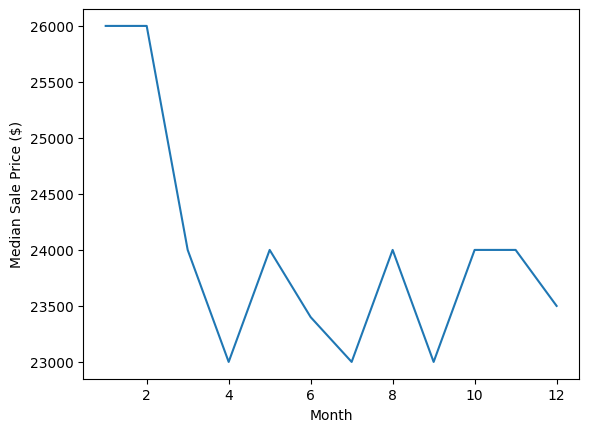

In [12]:
#  How about we see which month has the highest sales?
# Group DataFrame by saleMonth and then find the median SalePrice
df_tmp.groupby(["saleMonth"])["SalePrice"].median().plot()
plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)");


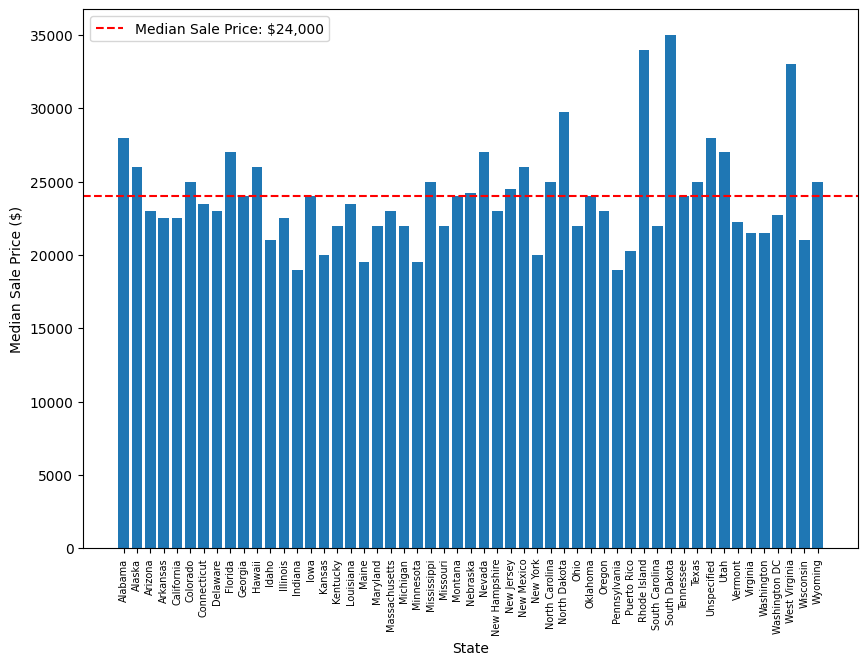

In [13]:
# Group DataFrame by saleMonth and then find the median SalePrice per state as well as across the whole dataset
median_prices_by_state = df_tmp.groupby(["state"])["SalePrice"].median() # this will return a pandas Series rather than a DataFrame
median_sale_price = df_tmp["SalePrice"].median()

# Create a plot comparing median sale price per state to median sale price overall
plt.figure(figsize=(10, 7))
plt.bar(x=median_prices_by_state.index, # Because we're working with a Series, we can use the index (state names) as the x values
        height=median_prices_by_state.values)
plt.xlabel("State")
plt.ylabel("Median Sale Price ($)")
plt.xticks(rotation=90, fontsize=7);
plt.axhline(y=median_sale_price, 
            color="red", 
            linestyle="--", 
            label=f"Median Sale Price: ${median_sale_price:,.0f}")
plt.legend();

### now we did explore enough of the data set lets start modeling 

## Model driven data exploration
We've performed a small Exploratory Data Analysis (EDA) as well as enriched it with some datetime attributes, now let's try to model it.

 we know the evaluation metric (root mean squared log error or RMSLE) we're heading towards.

We could spend more time doing EDA, finding more out about the data ourselves but what we'll do instead is use a machine learning model to help us do EDA whilst simultaneously working towards the best evaluation metric we can get.

In [14]:
""" 
but first when we were doing EDA there was some misiing values and differnet types objects 
its better to fix them before modeling 

"""
# Check for missing values and different datatypes 
df_tmp.info();

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [15]:
# Find missing values in the head of our DataFrame , True= missing and False= not missing
df_tmp.head().isna()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
274835,False,False,False,False,False,False,False,True,True,False,...,True,True,True,False,False,False,False,False,False,False
141296,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False
212552,False,False,False,False,False,False,False,True,True,False,...,True,True,True,False,False,False,False,False,False,False
62755,False,False,False,False,False,False,False,True,True,False,...,False,False,False,True,True,False,False,False,False,False


In [16]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [17]:
# print columns names and example content of columns containing strings 
for label , content in df_tmp.items () :
    if pd.api.types.is_string_dtype(content):
      column_datatype = df_tmp[label].dtype.name 

      example_value = content.sample(1).values

      example_dtype = pd.api.types.infer_dtype(example_value)
    
      print(f"column name : {label} | column_datatype {column_datatype} | exapmle : {example_value} | example type {example_dtype}")

column name : fiModelDesc | column_datatype object | exapmle : ['D6R'] | example type string
column name : fiBaseModel | column_datatype object | exapmle : ['310'] | example type string
column name : fiProductClassDesc | column_datatype object | exapmle : ['Track Type Tractor, Dozer - 130.0 to 160.0 Horsepower'] | example type string
column name : state | column_datatype object | exapmle : ['Texas'] | example type string
column name : ProductGroup | column_datatype object | exapmle : ['BL'] | example type string
column name : ProductGroupDesc | column_datatype object | exapmle : ['Track Excavators'] | example type string


In [18]:
# This will turn all of the object columns into category values
for label, content in df_tmp.items(): 
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = df_tmp[label].astype("category")


In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [20]:
# Check the datatype of a single column
df_tmp.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

excellent !!

In [21]:
# Get the category names of a given column
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [22]:
# Inspect the category codes
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [23]:
# Get example string using category number
target_state_cat_number = 43
target_state_cat_value = df_tmp.state.cat.categories[target_state_cat_number] 
print(f"[INFO] Target state category number {target_state_cat_number} maps to: {target_state_cat_value}")

[INFO] Target state category number 43 maps to: Texas


In [24]:
# now let's save our preprocessed dataframe 

df_tmp.to_csv("C:/Users/Windows10/OneDrive/المستندات/py2/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.csv",
              index=False)

In [25]:
# import to check 
df_tmp = pd.read_csv('C:/Users/Windows10/OneDrive/المستندات/py2/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.csv',
                     low_memory=False)

df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [26]:
# we have to change strings to categories again , bc csv format doesn't save these changes 
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        # Turn object columns into category datatype
        df_tmp[label] = df_tmp[label].astype("category")

In [27]:
# To save to parquet format ( which saves the changes of the data types )

df_tmp.to_parquet(path="C:/Users/Windows10/OneDrive/المستندات/py2/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.parquet", 
                  engine="auto") # "auto" will automatically use pyarrow or fastparquet, defaulting to pyarrow first

In [28]:
# Read in df_tmp from parquet format
df_tmp = pd.read_parquet(path="C:/Users/Windows10/OneDrive/المستندات/py2/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories.parquet",
                         engine="auto")

# Using parquet format, datatypes are preserved
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

### handling missing values 


In [29]:
# check which column has the most missing values
df_tmp.isna().sum().sort_values(ascending=False)[:20]

Blade_Width          386715
Enclosure_Type       386715
Engine_Horsepower    386715
Tip_Control          386715
Pushblock            386715
Blade_Extension      386715
Scarifier            386704
Grouser_Tracks       367823
Hydraulics_Flow      367823
Coupler_System       367724
fiModelSeries        354031
Steering_Controls    341176
Differential_Type    341134
UsageBand            339028
fiModelDescriptor    337882
Backhoe_Mounting     331986
Turbocharged         331602
Stick                331602
Pad_Type             331602
Blade_Type           330823
dtype: int64

In [30]:
# Find numeric columns to deal with first
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        # Check datatype of target column
        column_datatype = df_tmp[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

Column name: SalesID | Column dtype: int64 | Example value: [1622741] | Example value dtype: integer
Column name: SalePrice | Column dtype: float64 | Example value: [52000.] | Example value dtype: floating
Column name: MachineID | Column dtype: int64 | Example value: [1757705] | Example value dtype: integer
Column name: ModelID | Column dtype: int64 | Example value: [3359] | Example value dtype: integer
Column name: datasource | Column dtype: int64 | Example value: [132] | Example value dtype: integer
Column name: auctioneerID | Column dtype: float64 | Example value: [2.] | Example value dtype: floating
Column name: YearMade | Column dtype: int64 | Example value: [1976] | Example value dtype: integer
Column name: MachineHoursCurrentMeter | Column dtype: float64 | Example value: [7896.] | Example value dtype: floating
Column name: saleYear | Column dtype: int64 | Example value: [2008] | Example value dtype: integer
Column name: saleMonth | Column dtype: int64 | Example value: [2] | Exam

In [31]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: SalesID | Has missing values: False
Column name: SalePrice | Has missing values: False
Column name: MachineID | Has missing values: False
Column name: ModelID | Has missing values: False
Column name: datasource | Has missing values: False
Column name: auctioneerID | Has missing values: True
Column name: YearMade | Has missing values: False
Column name: MachineHoursCurrentMeter | Has missing values: True
Column name: saleYear | Has missing values: False
Column name: saleMonth | Has missing values: False
Column name: saleDay | Has missing values: False
Column name: saleDayofweek | Has missing values: False
Column name: saleDayofyear | Has missing values: False


Okay, it looks like our auctioneerID and MachineHoursCurrentMeter columns have missing numeric values.



In [32]:
# Fill missing numeric values with the median of the target column
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            # Add a binary column which tells if the data was missing our not
            df_tmp[label+"_is_missing"] = pd.isnull(content).astype(int) #  ( 0 = not missing, 1 = missing)

            # Fill missing numeric values with median since it's more robust than the mean
            df_tmp[label] = content.fillna(content.median())

In [33]:
# Show rows where MachineHoursCurrentMeter_is_missing == 1
df_tmp[df_tmp["MachineHoursCurrentMeter_is_missing"] == 1].sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
65513,1885762,18500.0,1487925,20108,132,2.0,1000,0.0,NaN,747,...,NaN,NaN,NaN,1998,4,25,5,115,0,1
14732,1386052,35000.0,1349782,4327,132,4.0,1987,0.0,NaN,IT18B,...,NaN,Standard,Conventional,1992,2,4,1,35,0,1
113335,1495539,25000.0,1300142,3537,132,1.0,1994,0.0,NaN,416B,...,NaN,NaN,NaN,2001,6,12,1,163,0,1
89298,1852287,11000.0,1552802,18673,132,1.0,1995,0.0,NaN,SL5625,...,NaN,NaN,NaN,2000,2,24,3,55,0,1
388106,1596944,14500.0,1512132,7944,132,99.0,2000,0.0,NaN,120,...,NaN,NaN,NaN,2011,8,11,3,223,0,1


In [34]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: SalesID | Has missing values: False
Column name: SalePrice | Has missing values: False
Column name: MachineID | Has missing values: False
Column name: ModelID | Has missing values: False
Column name: datasource | Has missing values: False
Column name: auctioneerID | Has missing values: False
Column name: YearMade | Has missing values: False
Column name: MachineHoursCurrentMeter | Has missing values: False
Column name: saleYear | Has missing values: False
Column name: saleMonth | Has missing values: False
Column name: saleDay | Has missing values: False
Column name: saleDayofweek | Has missing values: False
Column name: saleDayofyear | Has missing values: False
Column name: auctioneerID_is_missing | Has missing values: False
Column name: MachineHoursCurrentMeter_is_missing | Has missing values: False


no more missing numerical values !!

### filling and turning categorical values into numbers 


In [35]:
# creat a dictionary to store column to category values 
column_to_category_dict = {}

# turn categorical variables into numbers 
for label , content in df_tmp.items () :

    #check columns which aren't numeric 
    if not pd.api.types.is_numeric_dtype(content) :
        #add binary column to indicate whether sample had missing value 
        df_tmp[label+'is missing']= pd.isnull(content).astype(int)
        
        #ensure content is categorical and get its code 
        content_categories= pd.Categorical(content)
        content_categories_codes = content_categories.codes +1

        # add column key to dictionary with code 
        column_to_category_dict[label] = dict(zip(content_categories_codes , content_categories))
        # set the column to the numerical values (the category code values )
        df_tmp[label]  = content_categories_codes


In [36]:
df_tmp.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis missing,Stick_Lengthis missing,Thumbis missing,Pattern_Changeris missing,Grouser_Typeis missing,Backhoe_Mountingis missing,Blade_Typeis missing,Travel_Controlsis missing,Differential_Typeis missing,Steering_Controlsis missing
328070,1292453,14000.0,1357448,3171,132,1.0,1997,0.0,0,1076,...,1,1,1,1,1,1,1,1,1,1
393412,6263655,17000.0,1863781,7267,149,1.0,1970,0.0,0,1722,...,1,1,1,1,1,1,1,1,0,0
300561,1361683,27500.0,1217264,4128,132,14.0,1989,13200.0,3,2306,...,1,1,1,1,1,0,0,0,1,1
2876,1746497,28000.0,1105734,11933,132,24.0,1984,0.0,0,2261,...,1,1,1,1,1,0,0,0,1,1
103003,1393408,57000.0,1423288,4148,132,1.0,1984,0.0,0,2390,...,1,1,1,1,1,0,0,0,1,1


Beautiful! Looks like our data is all in numerical form.

How about we investigate an item from our column_to_category_dict?

This will show the mapping from numerical value to category (most likely a string) value.

In [37]:
# Check the first 10 state column values
for key, value in sorted(column_to_category_dict["state"].items())[:10]:
    print(f"{key} -> {value}")

1 -> Alabama
2 -> Alaska
3 -> Arizona
4 -> Arkansas
5 -> California
6 -> Colorado
7 -> Connecticut
8 -> Delaware
9 -> Florida
10 -> Georgia


In [38]:
# Check total number of missing values
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"[INFO] Total missing values: {total_missing_values} - nice , Let's build a model!")
else:
    print(f"[INFO] Uh ohh... total missing values: {total_missing_values} - Perhaps we might have to retrace our steps to fill the values?")

[INFO] Total missing values: 0 - nice , Let's build a model!


In [39]:
# Save preprocessed data with object values as categories as well as missing values filled
df_tmp.to_parquet(path="C:/Users/Windows10/OneDrive/المستندات/py2/bluebook-for-bulldozers/TrainAndValid_object_values_as_categories_and_missing_values_filled.parquet",
                  engine="auto")

### ** now we can finally start building out model **  

In [40]:

# Sample 1000 samples with random state 42 for reproducibility
df_tmp_sample_1k = df_tmp.sample(n=1000, random_state=42)

# Instantiate a model
import sklearn
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor (n_jobs=-1) # use -1 to utilise all available processors

# Create features and labels
X_sample_1k = df_tmp_sample_1k.drop("SalePrice", axis=1) # use all columns except SalePrice as X values
y_sample_1k = df_tmp_sample_1k["SalePrice"] # use SalePrice as y values (target variable)

# Fit the model to the sample data
model.fit(X=X_sample_1k, 
          y=y_sample_1k) 

RandomForestRegressor(n_jobs=-1)

In [41]:
# Evaluate the model
model_sample_1k_score = model.score(X=X_sample_1k,
                                    y=y_sample_1k)

print(f"[INFO] Model score on {len(df_tmp_sample_1k)} samples: {model_sample_1k_score}")

[INFO] Model score on 1000 samples: 0.9552844279732493


Wow, it looks like our model got a pretty good score on only 1000 samples (the best possible score it could achieve would've been 1.0). 

How about we try our model on the whole dataset?

In [42]:

# Instantiate model
model = RandomForestRegressor(n_jobs=-1) 

# Create features and labels with entire dataset
X_all = df_tmp.drop("SalePrice", axis=1)
y_all = df_tmp["SalePrice"]

# Fit the model
model.fit(X=X_all, 
          y=y_all)

RandomForestRegressor(n_jobs=-1)

In [43]:
# Evaluate the model
model_sample_all_score = model.score(X=X_all,
                                     y=y_all)

print(f"[INFO] Model score on {len(df_tmp)} samples: {model_sample_all_score}")

[INFO] Model score on 412698 samples: 0.987561399864301


very good ! 
but By default, sklearn.ensemble.RandomForestRegressor uses coefficient of determination ( R2  or R-squared) as the evaluation metric 

is this metric reliable ? 

we have to test on a validation set to make sure 



In [44]:
# Import train samples 
train_df = pd.read_csv("C:/Users/Windows10/OneDrive/المستندات/py2/bluebook-for-bulldozers/Train.csv",
                       parse_dates=["saledate"],
                       low_memory=False).sort_values(by="saledate", ascending=True)

# Import validation samples (
valid_df = pd.read_csv("C:/Users/Windows10/OneDrive/المستندات/py2/bluebook-for-bulldozers/Valid.csv",
                       parse_dates=["saledate"])

# The ValidSolution.csv contains the SalePrice values for the samples in Valid.csv
valid_solution = pd.read_csv("C:/Users/Windows10/OneDrive/المستندات/py2/bluebook-for-bulldozers/ValidSolution.csv")

# Map valid_solution to valid_df
valid_df["SalePrice"] = valid_df["SalesID"].map(valid_solution.set_index("SalesID")["SalePrice"])

# Make sure valid_df is sorted by saledate still
valid_df = valid_df.sort_values("saledate", ascending=True).reset_index(drop=True)

# How many samples are in each DataFrame?
print(f"[INFO] Number of samples in training DataFrame: {len(train_df)}")
print(f"[INFO] Number of samples in validation DataFrame: {len(valid_df)}")

[INFO] Number of samples in training DataFrame: 401125
[INFO] Number of samples in validation DataFrame: 11573


In [45]:
train_df.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
306539,2257238,23000,572831,3783,136,4.0,1000,0.0,NaN,2010-05-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
302197,2245826,18500,66520,1528,136,2.0,2001,0.0,NaN,2007-09-26,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
206336,1654618,13000,1151667,8552,132,1.0,1980,NaN,NaN,2003-03-11,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Semi U,None or Unspecified,NaN,NaN
44218,1285432,19500,1440310,6793,132,21.0,1991,NaN,NaN,2000-10-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86018,1389220,65000,1307672,3883,132,1.0,1977,NaN,NaN,1989-02-28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [46]:
valid_df.sample(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SalePrice
324,1223319,1053439,20869,121,3,2008,1130.0,Low,2012-01-26,560E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,90000.0
6748,6258233,1883407,3178,149,13,1995,NaN,NaN,2012-03-17,580SUPER L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17500.0
11013,6284750,1839275,11390,149,1,2006,NaN,NaN,2012-04-20,160CLC,...,None or Unspecified,Hydraulic,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,79000.0
7542,6267661,47238,1574,149,10,1999,NaN,NaN,2012-03-22,D5CIIILGP,...,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,21000.0
7834,6324353,1764665,5980,149,1,2001,NaN,NaN,2012-03-26,635B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17500.0


In [47]:
# split data into x , y 
x_train , y_train  = train_df.drop('SalePrice', axis =1),train_df.SalePrice
x_val ,y_val =  valid_df.drop('SalePrice', axis =1),valid_df.SalePrice

x_train.shape , y_train.shape , x_val.shape , y_val.shape

((401125, 52), (401125,), (11573, 52), (11573,))

### NOTE
 since we re-imported our training dataset (from Train.csv) its no longer all numerical 

Not to worry, we can fix this!

In [48]:
# Define numerical and categorical features
numerical_features = [label for label, content in x_train.items() if pd.api.types.is_numeric_dtype(content)]
categorical_features = [label for label, content in x_train.items() if not pd.api.types.is_numeric_dtype(content)]

print(f"[INFO] Numeric features: {numerical_features}")
print(f"[INFO] Categorical features: {categorical_features[:10]}...")

[INFO] Numeric features: ['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter']
[INFO] Categorical features: ['UsageBand', 'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state']...


In [49]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Create an ordinal encoder (turns category items into numeric representation)
ordinal_encoder = OrdinalEncoder(categories="auto",
                                 handle_unknown="use_encoded_value",
                                 unknown_value=np.nan,
                                 encoded_missing_value=np.nan) # treat unknown categories as np.nan (or None)

# 2. Fit and transform the categorical columns of X_train
X_train_preprocessed = x_train.copy() # make copies of the oringal DataFrames so we can keep the original values in tact and view them later
X_train_preprocessed[categorical_features] = ordinal_encoder.fit_transform(X_train_preprocessed[categorical_features].astype(str)) # OrdinalEncoder expects all values as the same type (e.g. string or numeric only)

# 3. Transform the categorical columns of X_valid 
X_valid_preprocessed = x_val.copy()
X_valid_preprocessed[categorical_features] = ordinal_encoder.transform(X_valid_preprocessed[categorical_features].astype(str)) # only use `transform` on the validation data

In [50]:
#Now how about missing values?
#Let's see the top 10 columns with the highest number of missing values from X_train.
x_train[categorical_features].isna().sum().sort_values(ascending=False)[:10]

Pushblock            375906
Tip_Control          375906
Enclosure_Type       375906
Engine_Horsepower    375906
Blade_Extension      375906
Blade_Width          375906
Scarifier            375895
Grouser_Tracks       357763
Hydraulics_Flow      357763
Coupler_System       357667
dtype: int64

In [51]:
#How about X_train_preprocessed?
X_train_preprocessed[categorical_features].isna().sum().sort_values(ascending=False)[:10]

UsageBand             0
saledate              0
fiModelDesc           0
fiBaseModel           0
fiSecondaryDesc       0
fiModelSeries         0
fiModelDescriptor     0
ProductSize           0
fiProductClassDesc    0
state                 0
dtype: int64

Now, what if we wanted to retrieve the original categorical values?

We can do using the OrdinalEncoder.categories_ attribute.

This will return the categories of each feature found during fit (or during fit_transform), the categories will be in the order of the features seen (same order as the columns of the DataFrame).

In [52]:
# Let's inspect the first three categories
ordinal_encoder.categories_[:3]

[array(['High', 'Low', 'Medium', 'nan'], dtype=object),
 array(['1989-01-17', '1989-01-31', '1989-02-01', ..., '2011-12-28',
        '2011-12-29', '2011-12-30'], dtype=object),
 array(['100C', '104', '1066', ..., 'ZX800LC', 'ZX80LCK', 'ZX850H'],
       dtype=object)]

In [53]:
# Create a dictionary of dictionaries mapping column names and their variables to their numerical encoding
column_to_category_mapping = {}

for column_name, category_values in zip(categorical_features, ordinal_encoder.categories_):
    int_to_category = {i: category for i, category in enumerate(category_values)}
    column_to_category_mapping[column_name] = int_to_category

# Inspect an example column name to category mapping
column_to_category_mapping["UsageBand"]

{0: 'High', 1: 'Low', 2: 'Medium', 3: 'nan'}

In [54]:
# Create a copy of the preprocessed DataFrame
X_train_unprocessed = X_train_preprocessed[categorical_features].copy()

# This will return an array of the original untransformed data
X_train_unprocessed = ordinal_encoder.inverse_transform(X_train_unprocessed)

# Turn back into a DataFrame for viewing pleasure
X_train_unprocessed_df = pd.DataFrame(X_train_unprocessed, columns=categorical_features)

# Check out a sample
X_train_unprocessed_df.sample(5)

,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
63027,Medium,1998-02-26,416B,416,B,nan,nan,nan,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Texas,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
358015,nan,2010-09-28,S150,S150,nan,nan,nan,nan,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,Texas,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
58207,nan,1997-09-11,732,732,nan,nan,nan,nan,Skid Steer Loader - 1251.0 to 1351.0 Lb Operat...,Ohio,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
239513,nan,2007-09-25,1845C,1845,C,nan,nan,nan,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,Colorado,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
310256,nan,2009-06-04,140G,140,G,nan,nan,nan,Motorgrader - 145.0 to 170.0 Horsepower,Colorado,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


### Training the model 

In [55]:

# Instantiate a Random Forest Regression model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model to the preprocessed training data
model.fit(X=X_train_preprocessed,
          y=y_train)

RandomForestRegressor(n_jobs=-1)

In [56]:
# Check model performance on the validation set
model.score(X=X_valid_preprocessed,
            y=y_val)

0.8145042225738958

In [57]:

# Check model performance on the training set
model.score(X=X_train_preprocessed,
            y=y_train)

0.9875183448867103

### evaluating the model 

In [58]:
# Create evaluation function (we want to use Root Mean Square Log Error)
from sklearn.metrics import mean_absolute_error, root_mean_squared_log_error

# Create function to evaluate our model
def show_scores(model, 
                train_features=X_train_preprocessed,
                train_labels=y_train,
                valid_features=X_valid_preprocessed,
                valid_labels=y_val):
    
    # Make predictions on train and validation features
    train_preds = model.predict(X=train_features)
    val_preds = model.predict(X=valid_features)

    # Create a scores dictionary of different evaluation metrics
    scores = {"Training MAE": mean_absolute_error(y_true=train_labels, 
                                                  y_pred=train_preds),
              "Valid MAE": mean_absolute_error(y_true=valid_labels, 
                                               y_pred=val_preds),
              "Training RMSLE": root_mean_squared_log_error(y_true=train_labels, 
                                                            y_pred=train_preds),
              "Valid RMSLE": root_mean_squared_log_error(y_true=valid_labels, 
                                                         y_pred=val_preds),
              "Training R^2": model.score(X=train_features, 
                                          y=train_labels),
              "Valid R^2": model.score(X=valid_features, 
                                       y=valid_labels)}
    return scores

In [59]:
# Try our model scoring function out
model_scores = show_scores(model=model)
model_scores

{'Training MAE': 1580.0162505619614,
 'Valid MAE': 7604.8709127567045,
 'Training RMSLE': 0.08453970328706482,
 'Valid RMSLE': 0.305972561987012,
 'Training R^2': 0.9875183448867103,
 'Valid R^2': 0.8145042225738958}

###  Tuning our model's hyperparameters

what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model

In [60]:

# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, # this is the default
                              n_jobs=-1,
                              max_samples=10000) # each estimator sees max_samples (the default is to see all available samples)

# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train_preprocessed, 
          y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1)

a lot faster !!!

In [61]:
# Get evaluation metrics from reduced sample model
base_model_scores = show_scores(model=model)
base_model_scores

{'Training MAE': 5421.924114851978,
 'Valid MAE': 7733.370544370518,
 'Training RMSLE': 0.2545178548210877,
 'Valid RMSLE': 0.31716904002855684,
 'Training R^2': 0.865638597351434,
 'Valid R^2': 0.8145120814645872}

### Hyperparameter tuning with RandomizedSearchCV

In [62]:

from sklearn.model_selection import RandomizedSearchCV

# 1. Define a dictionary with different values for RandomForestRegressor hyperparameters 
rf_grid = {"n_estimators": np.arange(10, 200, 10),
           "max_depth": [None, 10, 20],
           "min_samples_split": np.arange(2, 10, 1), 
           "min_samples_leaf": np.arange(1, 10, 1),
           "max_features": [0.5, 1.0, "sqrt"], 
           "max_samples": [10000]}

# 2. Setup instance of RandomizedSearchCV to explore different parameters 
rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(), # can pass new model instance directly, all settings will be taken from the rf_grid
                              param_distributions=rf_grid,
                              n_iter=20,
                            #   scoring="neg_root_mean_squared_log_error", # want to optimize for RMSLE, though sometimes optimizing for the default metric (R^2) can lead to just as good results all round
                              cv=3,
                              verbose=3) # control how much output gets produced, higher number = more output

# 3. Fit the model using a series of different hyperparameter values
rs_model.fit(X=X_train_preprocessed, 
             y=y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END max_depth=20, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=5, n_estimators=190;, score=0.545 total time=  36.1s
[CV 2/3] END max_depth=20, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=5, n_estimators=190;, score=0.752 total time=  33.8s
[CV 3/3] END max_depth=20, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=5, n_estimators=190;, score=0.642 total time=  26.9s
[CV 1/3] END max_depth=20, max_features=0.5, max_samples=10000, min_samples_leaf=8, min_samples_split=8, n_estimators=120;, score=0.541 total time=  33.1s
[CV 2/3] END max_depth=20, max_features=0.5, max_samples=10000, min_samples_leaf=8, min_samples_split=8, n_estimators=120;, score=0.764 total time=  31.9s
[CV 3/3] END max_depth=20, max_features=0.5, max_samples=10000, min_samples_leaf=8, min_samples_split=8, n_estimators=120;, score=0.649 total time=  23.9s
[CV 1/

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   verbose=3)

In [63]:
# Find the best parameters from RandomizedSearchCV
rs_model.best_params_

{'n_estimators': np.int64(90),
 'min_samples_split': np.int64(3),
 'min_samples_leaf': np.int64(3),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [64]:
# Evaluate the RandomizedSearch model
rs_model_scores = show_scores(rs_model)
rs_model_scores

{'Training MAE': 5693.543423131304,
 'Valid MAE': 7869.986436940307,
 'Training RMSLE': 0.2634147948150358,
 'Valid RMSLE': 0.3213261725617162,
 'Training R^2': 0.853028080184857,
 'Valid R^2': 0.8060395425461551}

### now it's time to start Training a model with the best hyperparameters

In [65]:
# Create a model with best found hyperparameters ( by the instructor )

ideal_model = RandomForestRegressor(n_estimators=90,
                                    max_depth=None,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

# Fit a model to the preprocessed data
ideal_model.fit(X=X_train_preprocessed, 
                y=y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=5, n_estimators=90,
                      n_jobs=-1)

In [66]:
# Evaluate ideal model
ideal_model_scores = show_scores(model=ideal_model)
ideal_model_scores

{'Training MAE': 1995.3873471464278,
 'Valid MAE': 6661.631679571554,
 'Training RMSLE': 0.10360220451866926,
 'Valid RMSLE': 0.276722311224874,
 'Training R^2': 0.9804595211963402,
 'Valid R^2': 0.8615336557884791}

In [67]:
# Halve the number of estimators
fast_model = RandomForestRegressor(n_estimators=45,
                                   max_depth=None,
                                   min_samples_leaf=1,
                                   min_samples_split=5,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None)

# Fit the faster model to the data
fast_model.fit(X=X_train_preprocessed, 
               y=y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=5, n_estimators=45,
                      n_jobs=-1)

In [68]:
# Get results from the fast model
fast_model_scores = show_scores(model=fast_model)
fast_model_scores

{'Training MAE': 2020.967588089852,
 'Valid MAE': 6616.035526700083,
 'Training RMSLE': 0.10500158728105939,
 'Valid RMSLE': 0.2738921980262773,
 'Training R^2': 0.9798736311502669,
 'Valid R^2': 0.8622430304518269}

### Comparing our model's scores

We've built four models so far with varying amounts of data and hyperparameters.

Let's compile the results into a DataFrame and then make a plot to compare them.

In [69]:
# Add names of models to dictionaries
base_model_scores["model_name"] = "default_model"
rs_model_scores["model_name"] = "random_search_model"
ideal_model_scores["model_name"] = "ideal_model" 
fast_model_scores["model_name"] = "fast_model" 

# Turn all model score dictionaries into a list
all_model_scores = [base_model_scores, 
                    rs_model_scores, 
                    ideal_model_scores,
                    fast_model_scores]

# Create DataFrame and sort model scores by validation RMSLE
model_comparison_df = pd.DataFrame(all_model_scores).sort_values(by="Valid RMSLE", ascending=False)
model_comparison_df.head()

,Training MAE,Valid MAE,Training RMSLE,Valid RMSLE,Training R^2,Valid R^2,model_name
1,5693.543423,7869.986437,0.263415,0.321326,0.853028,0.806040,random_search_model
0,5421.924115,7733.370544,0.254518,0.317169,0.865639,0.814512,default_model
2,1995.387347,6661.631680,0.103602,0.276722,0.980460,0.861534,ideal_model
3,2020.967588,6616.035527,0.105002,0.273892,0.979874,0.862243,fast_model


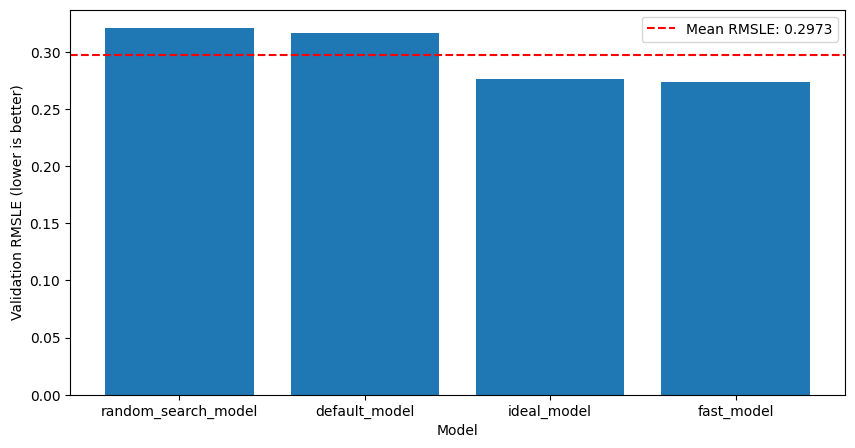

In [70]:
# Get mean RSMLE score of all models
mean_rsmle_score = model_comparison_df["Valid RMSLE"].mean()

# Plot validation RMSLE against each other 
plt.figure(figsize=(10, 5))
plt.bar(x=model_comparison_df["model_name"],
        height=model_comparison_df["Valid RMSLE"].values)
plt.xlabel("Model")
plt.ylabel("Validation RMSLE (lower is better)")
plt.xticks(rotation=0, fontsize=10);
plt.axhline(y=mean_rsmle_score, 
            color="red", 
            linestyle="--", 
            label=f"Mean RMSLE: {mean_rsmle_score:.4f}")
plt.legend();

By the looks of the plot, our (fast_model) is the ideal model

###  Saving our best model to file

In [71]:
import joblib

bulldozer_price_prediction_model_name = "randomforest_regressor_best_RMSLE.pkl"

# Save model to file
joblib.dump(value=fast_model, 
            filename=bulldozer_price_prediction_model_name)

['randomforest_regressor_best_RMSLE.pkl']

In [72]:
# Load the best model
best_model = joblib.load(filename=bulldozer_price_prediction_model_name)
best_model

RandomForestRegressor(max_features=0.5, min_samples_split=5, n_estimators=45,
                      n_jobs=-1)

In [73]:
# Confirm that the model works
best_model_scores = show_scores(model=fast_model)
best_model_scores

{'Training MAE': 2020.967588089852,
 'Valid MAE': 6616.035526700083,
 'Training RMSLE': 0.10500158728105939,
 'Valid RMSLE': 0.2738921980262773,
 'Training R^2': 0.9798736311502669,
 'Valid R^2': 0.8622430304518269}

In [108]:
# Load the test data
test_df = pd.read_csv(filepath_or_buffer="C:/Users/Windows10/OneDrive/المستندات/py2/bluebook-for-bulldozers/Test.csv",
                      parse_dates=["saledate"])

# Function to add date columns
def add_datetime_features_to_df(df, date_column='saledate'): 
    # Add datetime parameters 
    df["saleYear"] = df[date_column].dt.year
    df["saleMonth"] = df[date_column].dt.month
    df["saleDay"] = df[date_column].dt.day
    df["saleDayofweek"] = df[date_column].dt.dayofweek
    df["saleDayofyear"] = df[date_column].dt.dayofyear

# Preprocessing the test data
def preprocess_test_data(test_df):
    # Attempt to drop the 'saledata' column if it exists
    try:
        test_df.drop(columns=['saledata'], inplace=True)
    except KeyError:
        print("Column 'saledata' not found, ignoring the error.")

    # Add datetime features 
    date_features = add_datetime_features_to_df(df=test_df)
    test_df = pd.concat([test_df, date_features], axis=1)

    return test_df

# Preprocess the test data
test_df_preprocessed =test_df.copy()

# Convert categorical features to numbers
test_df_preprocessed[categorical_features] = ordinal_encoder.transform((test_df_preprocessed[categorical_features]).astype(str))
test_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  2129 non-null   float64
 7   UsageBand                 12457 non-null  float64
 8   saledate                  0 non-null      float64
 9   fiModelDesc               12349 non-null  float64
 10  fiBaseModel               12431 non-null  float64
 11  fiSecondaryDesc           12449 non-null  float64
 12  fiModelSeries             12456 non-null  float64
 13  fiModelDescriptor         12452 non-null  float64
 14  Produc

### Making predictions on test data

In [110]:
# Make predictions on the preprocessed test data
test_preds = best_model.predict(test_df_preprocessed)
# Check the first 10 test predictions
test_preds[:10]

array([21849.97354497, 31768.6822591 , 45878.77425044, 93109.6031746 ,
       31426.88712522, 29394.31216931, 27035.85097002, 19321.68650794,
       20481.62698413, 45378.10846561])

In [111]:
# Check number of test predictions
test_preds.shape, test_df.shape

((12457,), (12457, 52))

In [112]:
#saving the work 

pred_df = pd.DataFrame()
pred_df["SalesID"] = test_df["SalesID"]
pred_df["SalePrice"] = test_preds
pred_df.sample(5)

,SalesID,SalePrice
6132,6299456,49889.470899
266,1228730,43401.406926
7151,6312491,13326.997354
9099,6450092,23040.211640
1059,4252211,29826.600529


Excellent! We've got a SalePrice prediction for every SalesID in the test DataFrame.

Let's save this to CSV so we could upload it or share it with someone else if we had to.

In [113]:
# Export test dataset predictions to CSV
pred_df.to_csv("C:/Users/Windows10/OneDrive/المستندات/py2/bluebook-for-bulldozers/predictions.csv",
               index=False)

 ### Finding the most important predictive features

In [114]:
# Find feature importance of our best model
best_model_feature_importances = best_model.feature_importances_
best_model_feature_importances

array([0.03880615, 0.02824114, 0.05976289, 0.002143  , 0.0062205 ,
       0.19987203, 0.00696537, 0.00156679, 0.09020195, 0.05239643,
       0.03687787, 0.03777059, 0.00568229, 0.03462348, 0.16147691,
       0.04511775, 0.01026566, 0.00652183, 0.00241767, 0.00157737,
       0.05983358, 0.00530434, 0.00130198, 0.00243503, 0.00030014,
       0.00136835, 0.00022332, 0.00571832, 0.00122315, 0.00594846,
       0.00355651, 0.00174594, 0.00398109, 0.00466665, 0.00281964,
       0.00298753, 0.01398423, 0.00201577, 0.01651103, 0.01484687,
       0.00466164, 0.00192378, 0.00167784, 0.00162978, 0.00103399,
       0.00093422, 0.00086524, 0.00107703, 0.00268425, 0.00313065,
       0.00052952, 0.00057248])

In [115]:
print(f"[INFO] Number of feature importance values: {best_model_feature_importances.shape[0]}") 
print(f"[INFO] Number of features in training dataset: {X_train_preprocessed.shape[1]}")

[INFO] Number of feature importance values: 52
[INFO] Number of features in training dataset: 52


In [116]:
# Create feature importance DataFrame
column_names = test_df.columns
feature_importance_df = pd.DataFrame({"feature_names": column_names,
                                      "feature_importance": best_model_feature_importances}).sort_values(by="feature_importance",
                                                                                                         ascending=False)
feature_importance_df.head()

,feature_names,feature_importance
5,YearMade,0.199872
14,ProductSize,0.161477
8,saledate,0.090202
20,Enclosure,0.059834
2,ModelID,0.059763


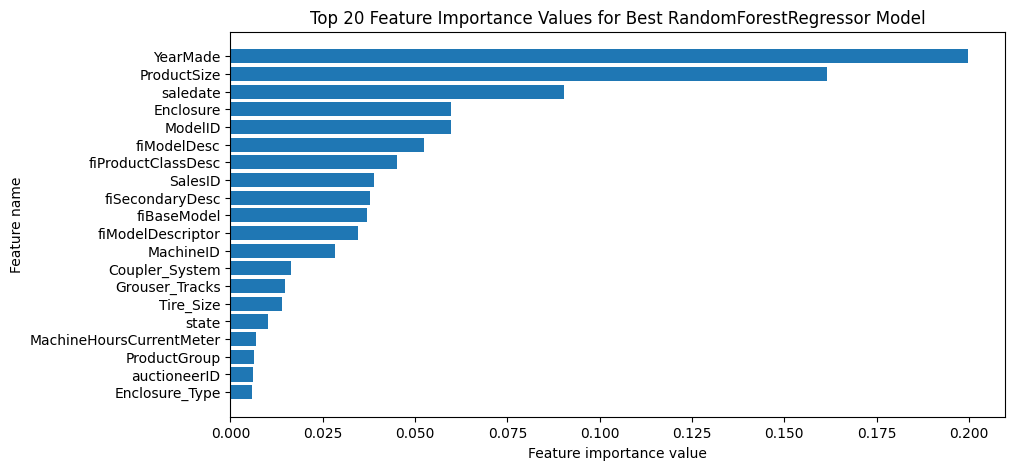

In [117]:
# Plot the top feature importance values
top_n = 20
plt.figure(figsize=(10, 5))
plt.barh(y=feature_importance_df["feature_names"][:top_n], # Plot the top_n feature importance values
         width=feature_importance_df["feature_importance"][:top_n])
plt.title(f"Top {top_n} Feature Importance Values for Best RandomForestRegressor Model")
plt.xlabel("Feature importance value")
plt.ylabel("Feature name")
plt.gca().invert_yaxis();

### we've now got a machine learning model capable of predicting the sale price of bulldozers given their features/attributes!